In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a class for tree nodes
class TreeNode:
    def __init__(self, key):
        self.key = key  # Store the node value
        self.left = None  # Pointer to left child
        self.right = None  # Pointer to right child

# Define a class for the Binary Search Tree (BST)
class BST:
    def __init__(self):
        self.root = None  # Initialize the root of the tree as None
    
    # Insert a key into the BST
    def insert(self, key):
        if self.root is None:
            self.root = TreeNode(key)  # Create root node if tree is empty
        else:
            self._insert_recursive(self.root, key)  # Call recursive helper function
    
    # Recursive insertion helper function
    def _insert_recursive(self, node, key):
        if key < node.key:  # Go left if the key is smaller
            if node.left is None:
                node.left = TreeNode(key)  # Insert new node if left is empty
            else:
                self._insert_recursive(node.left, key)  # Recur for left subtree
        else:  # Go right if the key is larger or equal
            if node.right is None:
                node.right = TreeNode(key)  # Insert new node if right is empty
            else:
                self._insert_recursive(node.right, key)  # Recur for right subtree
    
    # Search for a key in the BST
    def search(self, key):
        return self._search_recursive(self.root, key)
    
    # Recursive search helper function
    def _search_recursive(self, node, key):
        if node is None or node.key == key:
            return node  # Return node if found or None if not found
        elif key < node.key:
            return self._search_recursive(node.left, key)  # Search in left subtree
        else:
            return self._search_recursive(node.right, key)  # Search in right subtree
    
    # Update a key in the BST by deleting and reinserting with new value
    def update(self, old_key, new_key):
        self.delete(old_key)  # Delete the old key
        self.insert(new_key)  # Insert the new key
    
    # Delete a key from the BST
    def delete(self, key):
        self.root = self._delete_recursive(self.root, key)
    
    # Recursive delete helper function
    def _delete_recursive(self, node, key):
        if node is None:
            return node  # Return None if key is not found
        
        if key < node.key:
            node.left = self._delete_recursive(node.left, key)  # Go left
        elif key > node.key:
            node.right = self._delete_recursive(node.right, key)  # Go right
        else:
            # Node with only one child or no child
            if node.left is None:
                return node.right  # Replace node with right child
            elif node.right is None:
                return node.left  # Replace node with left child
            
            # Node with two children: Find the inorder successor (smallest in right subtree)
            temp = self._find_min(node.right)
            node.key = temp.key  # Replace node's key with inorder successor's key
            node.right = self._delete_recursive(node.right, temp.key)  # Delete successor
        
        return node
    
    # Helper function to find the minimum value node in a subtree
    def _find_min(self, node):
        current = node
        while current.left is not None:
            current = current.left  # Move left to find the minimum node
        return current
    
    # Function to visualize the BST using networkx and matplotlib
    def visualize(self):
        G = nx.DiGraph()  # Create a directed graph
        self._add_edges(G, self.root)  # Add nodes and edges to the graph
        pos = self._hierarchy_pos(G, self.root.key)  # Compute positions for visualization
        plt.figure(figsize=(8, 6))
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, edge_color='gray')
        plt.show()
    
    # Recursive function to add edges to the graph
    def _add_edges(self, G, node, parent=None):
        if node:
            G.add_node(node.key)  # Add the node
            if parent is not None:
                G.add_edge(parent, node.key)  # Connect to parent
            self._add_edges(G, node.left, node.key)  # Recur for left subtree
            self._add_edges(G, node.right, node.key)  # Recur for right subtree
    
    # Function to generate hierarchical positions for visualization
    def _hierarchy_pos(self, G, root, width=1.5, vert_gap=0.3, xcenter=0.5, pos=None, parent=None, level=0):
        if pos is None:
            pos = {root: (xcenter, 1 - level * vert_gap)}  # Set root position
        neighbors = list(G.neighbors(root))  # Get child nodes
        if len(neighbors) > 0:
            dx = width / len(neighbors)  # Compute horizontal spacing
            nextx = xcenter - width/2 - dx/2
            for neighbor in neighbors:
                nextx += dx
                pos[neighbor] = (nextx, 1 - (level + 1) * vert_gap)  # Set child position
                pos.update(self._hierarchy_pos(G, neighbor, width=dx, vert_gap=vert_gap, xcenter=nextx, pos=pos, parent=root, level=level + 1))
        return pos



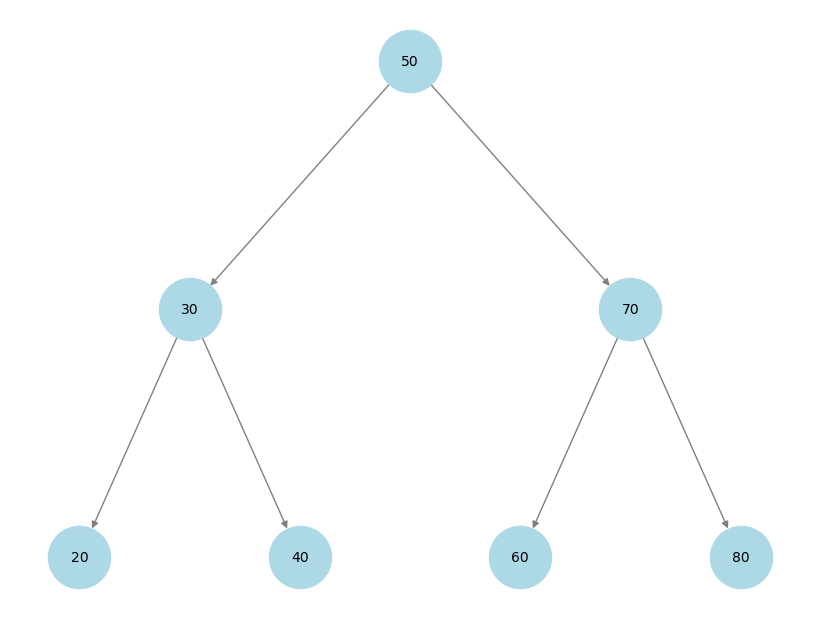

In [4]:
# Example Usage
bst = BST()
bst.insert(50)
bst.insert(30)
bst.insert(70)
bst.insert(20)
bst.insert(40)
bst.insert(60)
bst.insert(80)

# Visualize the BST
bst.visualize()



In [5]:
# Search for a node
print("Search for 40:", bst.search(40) is not None)  # Returns True if found



Search for 40: True


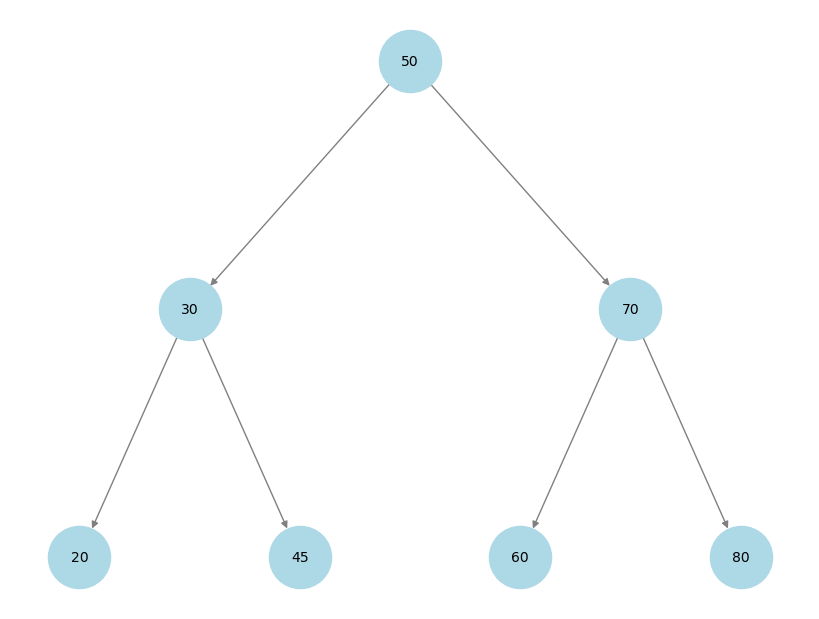

In [6]:
# Update a node (delete old value and insert new one)
bst.update(40, 45)

# Visualize the BST
bst.visualize()


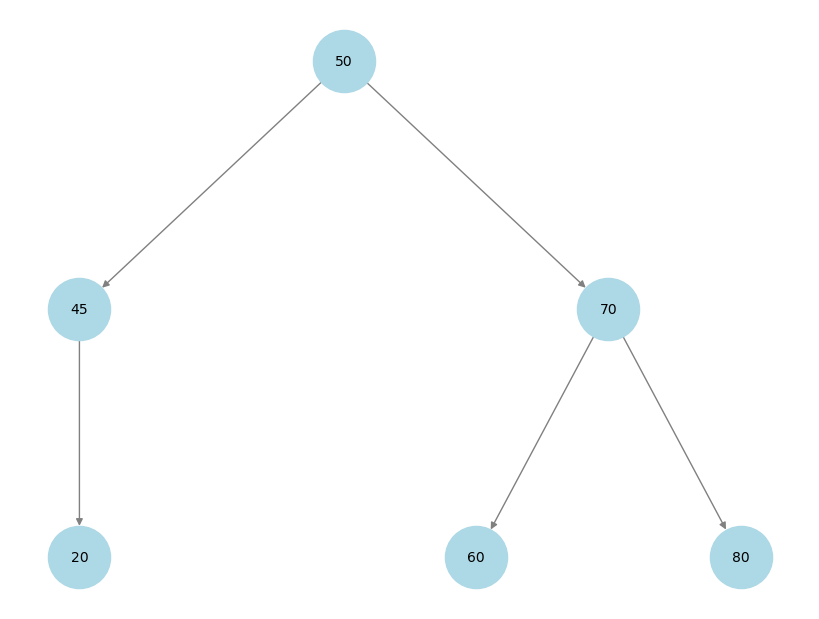

In [7]:

# Delete a node
bst.delete(30)

# Visualize the BST
bst.visualize()
